In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from glob import glob
from sklearn.metrics import r2_score
from math import sqrt
from numpy import concatenate
import numpy as np
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import tree
from matplotlib import pyplot
from random import randint
from sklearn.metrics import mean_absolute_error
import math
import numpy as np
np.random.seed(1337)

# import tensorflow as tf
# from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
df2016 = pd.read_csv (r'PSM_IowaCity,IA_2016.csv',index_col = False,skiprows=3, names = ['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','Dew Point','Solar Zenith Angle','Wind Speed','Relative Humidity','Temperature','Pressure'
])
df2017 = pd.read_csv (r'PSM_IowaCity,IA_2017.csv',index_col = False,skiprows=3, names = ['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','Dew Point','Solar Zenith Angle','Wind Speed','Relative Humidity','Temperature','Pressure'
])
df2018= pd.read_csv (r'PSM_IowaCity,IA_2018.csv',index_col = False,skiprows=3, names = ['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','Dew Point','Solar Zenith Angle','Wind Speed','Relative Humidity','Temperature','Pressure'
])
dftraining= df2016.append([df2017,df2018])

In [5]:
dftesting = pd.read_csv (r'PSM_IowaCity,IA_2019.csv',index_col = False,skiprows=3, names = ['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','Dew Point','Solar Zenith Angle','Wind Speed','Relative Humidity','Temperature','Pressure'
])
dftesting.shape

(17520, 14)

In [326]:
def combine_training_arrays(df, input_arry, output_arr):
    ghi  = df['GHI'].values
    temp  = df['Temperature'].values
    #cloud_cover = df['Cloud Cover'].values
    hours = df['Hour'].values
    minutes = df['Minute'].values
    solar_zenith = df['Solar Zenith Angle'].values
    pressure = df['Pressure'].values
    dhi = df['DHI'].values
    dni = df['DNI'].values
    #Sanity check, should all be 8760
    #assert len(pressure)==len(solar_zenith)==len(minutes)==len(hours)==len(ghi)==8760, "len of input array not 8760"
    ar = np.array([ghi,hours, minutes, solar_zenith, pressure,temp]).T
    input_arry = np.concatenate((input_arry, ar))
    output_arr = np.concatenate((output_arr, np.array(dhi).T))
    return input_arry, output_arr

In [327]:
input_size = 6
input_arry = np.array([]).reshape(0,input_size)
output_arry = np.array([])

input_arry, output_arry = combine_training_arrays(dftraining, input_arry, output_arry)

In [328]:
X_train = input_arry 
Y_train = output_arry

print(X_train.shape)
print(Y_train.shape)

(52560, 6)
(52560,)


In [329]:
def create_testing_arrays(df, input_arry, output_arr):
    ghi  = df['GHI'].values
    temp  = df['Temperature'].values
    #cloud_cover = df['Cloud Cover'].values
    hours = df['Hour'].values
    minutes = df['Minute'].values
    solar_zenith = df['Solar Zenith Angle'].values
    pressure = df['Pressure'].values
    dhi = df['DHI'].values
    dni = df['DNI'].values
    #Sanity check, should all be 8760
    #assert len(pressure)==len(solar_zenith)==len(minutes)==len(hours)==len(ghi)==8760, "len of input array not 8760"
    ar = np.array([ ghi,hours, minutes, solar_zenith, pressure,temp]).T
    input_arry = np.concatenate((input_arry, ar))
    output_arr = np.concatenate((output_arr, np.array(dhi).T))
    return input_arry, output_arr

In [330]:
input_size = 6
test_input_arry = np.array([]).reshape(0,input_size)
test_output_arry = np.array([])

test_input_arry, test_output_arry = create_testing_arrays(dftesting, test_input_arry, test_output_arry)

In [331]:
X_test=test_input_arry
y_test=test_output_arry

print(X_test.shape)
print(y_test.shape)


(17520, 6)
(17520,)


In [332]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
# design svm model
#clf = SVR()
clf = SVR(kernel='poly', C=25, gamma='scale')
# fit model
clf.fit(X_train,Y_train)

# make a prediction
predict2_y = clf.predict(X_test)
#yhat = predict_y.reshape(predict_y.shape[0],1)
#test_X = test_X.reshape((test_X.shape[0],n_mins*n_features))
print(r2_score(y_test, predict2_y))
MSE=mean_squared_error(y_test,predict2_y) 
print('mean square error', MSE)
# inv_yhat = concatenate((test_X[:, 7:-1], yhat), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,-1]

# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_X[:, -24:-1], test_y), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,-1]

# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)
# # calculate MAPE
# mape = np.mean(np.fabs((inv_y - inv_yhat) / inv_y)) * 100
# print('Test mape: %d' % mape)

# # plot 
# pyplot.plot([x for x in range(1, inv_yhat.shape[0]+1)], inv_yhat, linestyle='-', color='red', label='prediction')
# pyplot.plot([x for x in range(1, inv_y.shape[0]+1)], inv_y, linestyle='-', color='blue', label='actual')
# pyplot.legend(loc=1, prop={'size': 12})
# pyplot.show()

0.9057119514424765
mean square error 824.8388848199241


15.486261013677257


Text(0, 0.5, 'DNI (W/m^2)')

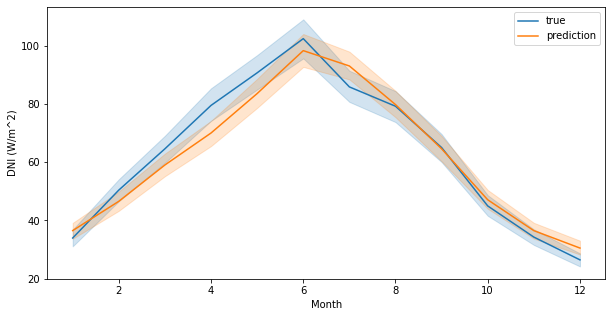

In [333]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, predict2_y))
plt.figure(figsize=(10, 5))
sns.lineplot(x = dftesting.Month, y = y_test ,data = dftesting,label="true")
sns.lineplot(x = dftesting.Month, y = predict2_y, data = dftesting,label="prediction")
plt.ylabel('DNI (W/m^2)')
# plt.plot(np.arange(len(y_test[0:1488])), y_test[0:1488], marker='', label="true")
# plt.plot(np.arange( len(y_test[0:1488])), predict2_y[0:1488], 'y', label="prediction")

In [25]:
 from sklearn.metrics import mean_absolute_percentage_error

ImportError: cannot import name 'mean_absolute_percentage_error' from 'sklearn.metrics' (C:\Users\abood\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predict_y)

17.531396063561704

In [78]:
column = dftesting["GHI"]
max_value = column.max()



print(max_value)

1021


In [230]:

from tensorflow.keras.optimizers import Adam


In [231]:
keras.backend.clear_session()
tf.keras.backend.clear_session()

In [232]:
keras.backend.clear_session()
tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph

<function tensorflow.python.framework.ops.reset_default_graph()>

In [233]:
keras.backend.clear_session()
tf.keras.backend.clear_session()

In [117]:
# pca = PCA(n_components=7)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# pca.fit(X_test)
# X_test = pca.transform(X_test)	
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)

model = keras.Sequential()
# model.add(layers.Dense(300, activation="relu"))
# model.add(layers.Dense(200, activation="relu"))
# model.add(layers.Dense(100, activation="relu"))
# model.add(layers.Dense(50, activation="relu"))
# model.add(layers.Dense(25, activation="relu"))
# model.add(layers.Dense(1, activation='relu'))

# model.add(layers.Dense(6, activation="relu"))
# #model.add(layers.Dense(20, activation="relu"))
# model.add(layers.Dense(10, activation="relu"))
# model.add(layers.Dense(1))

model.add(layers.Dense(12, input_dim=6, activation="relu"))
#model.add(Dense(12, activation=’relu’))
model.add(layers.Dense(1, activation="softmax"))

In [118]:
#Dependencies
#import keras
# from keras.models import Sequential
# from keras.layers import Dense
# Neural network
# model = keras.Sequential()
# model.add(layers.Dense(6, activation="relu"))
# #model.add(layers.Dense(20, activation="relu"))
# model.add(layers.Dense(12, activation="relu"))
# model.add(layers.Dense(1))
# model = keras.Sequential()
# model.add(layers.Dense(12, input_dim=6, activation="relu"))
# #model.add(Dense(12, activation=’relu’))
# # model.add(layers.Dense(1, activation="softmax"))
# model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
# history = model.fit(X_train, Y_train, epochs=100, batch_size=64)

In [119]:
model.compile(optimizer='adam', 
              loss='mse',
              metrics=['accuracy'])#['mae',keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train,Y_train, epochs=100)
model.summary()

Epoch 1/100
1643/1643 [==============================] - 1s 461us/step - loss: 13217.7505 - accuracy: 0.0012
Epoch 2/100
1643/1643 [==============================] - 1s 444us/step - loss: 12836.4829 - accuracy: 0.0011
Epoch 3/100
1643/1643 [==============================] - 1s 439us/step - loss: 12833.2813 - accuracy: 0.0010
Epoch 4/100
1643/1643 [==============================] - 1s 450us/step - loss: 13007.7199 - accuracy: 0.0013
Epoch 5/100
1643/1643 [==============================] - 1s 443us/step - loss: 12775.0866 - accuracy: 0.0011
Epoch 6/100
1643/1643 [==============================] - 1s 446us/step - loss: 12860.7149 - accuracy: 0.0014
Epoch 7/100
1643/1643 [==============================] - 1s 455us/step - loss: 13032.4773 - accuracy: 0.0012
Epoch 8/100
1643/1643 [==============================] - 1s 448us/step - loss: 12738.3461 - accuracy: 0.0011
Epoch 9/100
1643/1643 [==============================] - 1s 450us/step - loss: 12767.4622 - accuracy: 0.0013
Epoch 10/100
1643/1

Epoch 1/100
1643/1643 [==============================] - 2s 663us/step - loss: 110.6883 - accuracy: 0.0011 - val_loss: 54.5015 - val_accuracy: 0.0038
Epoch 2/100
1643/1643 [==============================] - 1s 602us/step - loss: 47.3424 - accuracy: 0.0014 - val_loss: 33.1139 - val_accuracy: 0.2920
Epoch 3/100
1643/1643 [==============================] - 1s 604us/step - loss: 31.9127 - accuracy: 0.3312 - val_loss: 28.9228 - val_accuracy: 0.3994
Epoch 4/100
1643/1643 [==============================] - 1s 600us/step - loss: 29.1404 - accuracy: 0.4045 - val_loss: 27.4003 - val_accuracy: 0.4384
Epoch 5/100
1643/1643 [==============================] - 1s 609us/step - loss: 28.2904 - accuracy: 0.4437 - val_loss: 26.6192 - val_accuracy: 0.4587
Epoch 6/100
1643/1643 [==============================] - 1s 613us/step - loss: 27.9062 - accuracy: 0.4626 - val_loss: 26.1989 - val_accuracy: 0.4709
Epoch 7/100
1643/1643 [==============================] - 1s 632us/step - loss: 27.2207 - accuracy: 0.4783

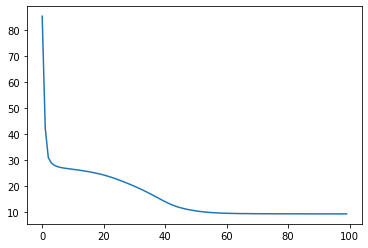

<Figure size 432x288 with 0 Axes>

In [266]:
model = keras.Sequential()
#model.add(layers.Dense(6, input_shape=(6,),activation = "relu"))
# model.add(Activation('relu'))

# model.add(layers.Dense(11,activation = "relu"))
# # model.add(layers.Activation('relu'))
# model.add(layers.Dense(10))
# model.add(layers.Dense(1))

model.add(layers.Dense(6, activation="relu"))
# model.add(layers.Dense(12, activation="relu"))
# model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dense(14, activation="relu"))
# model.add(layers.Dense(50, activation="relu"))
# model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(1, activation='relu'))

#model.summary()
# from keras import optimizers
from tensorflow.keras.optimizers import SGD
#sgd = optimizers.SGD(lr=0.1,momentum=0.2)
model.compile(loss='mean_absolute_error',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

#history = model.fit(X_train, Y_train,
 #                    epochs=100)

history = model.fit(X_train, Y_train,validation_data = (X_test,y_test), epochs=100)
score = model.evaluate(X_test, y_test, verbose=0)
# import matplotlib.pyplot as plt
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

error = score[0]

plt.plot(history.history['loss'])
plt.show()
plt.gcf().clear()


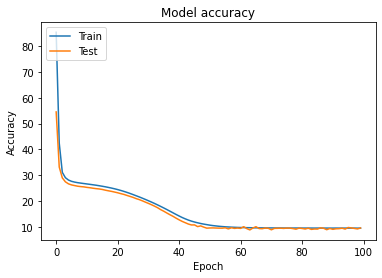

In [267]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(20, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [268]:
print(error)

y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
    
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a)


9.492711067199707
Accuracy is: 1.0


In [199]:
plt.plot(history.history['mae'])
plt.plot(history.history['root_mean_squared_error'])
plt.title('MAE and RMSE per epoch')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['MAE', 'RMSE'], loc='middle')
plt.savefig('error-v-epoch.png')
plt.show()

KeyError: 'mae'

In [334]:

preds = model.predict(X_test)
print(r2_score(y_test, preds))
MSE=mean_squared_error(y_test,preds) 
print('mean square error', MSE)

0.9353319851717209
mean square error 565.7206194264785


In [259]:
i = randint(0,8760)
print("index is ",i)
print("Actual ",y_test[i]," ","Predicted ", preds[i])

index is  126
Actual  45.0   Predicted  [52.077473]


Exception: Data must be 1-dimensional

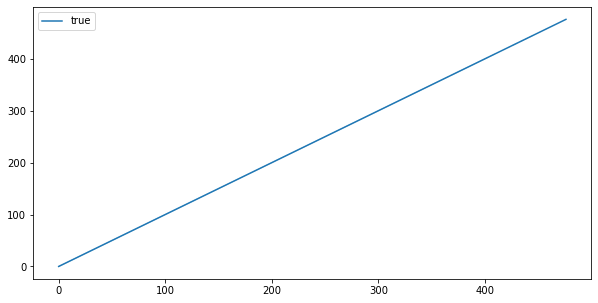

In [174]:
plt.figure(figsize=(10, 5))
sns.lineplot(x = y_test, y = y_test ,data = dftesting,label="true")
sns.lineplot(x = y_test, y = y_pred, data = dftesting,label="prediction")
plt.ylabel('GHI (W/m^2)')

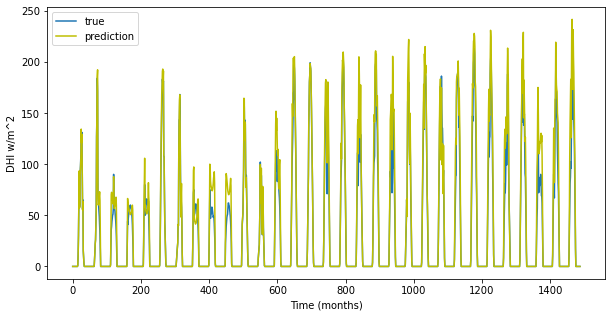

In [335]:
plt.figure(figsize=(10, 5))
# plt.plot(np.arange(len(Y_train[0:49]), len(Y_train) + len(y_test)), y_test, marker='.', label="true")
# plt.plot(np.arange(len(Y_train[0:49]), len(Y_train) + len(y_test)), preds, 'r', label="prediction")
# plt.plot(np.arange(len(y_test)), y_test, marker='', label= "true")

# plt.plot(np.arange( len(y_test)), preds, marker = "", label="prediction")
plt.plot(np.arange(len(y_test[0:1488])), y_test[0:1488], marker='', label="true")
plt.plot(np.arange( len(y_test[0:1488])), preds[0:1488], 'y', label="prediction")
plt.ylabel('DHI w/m^2')
plt.xlabel('Time (months)')
# # plt.plot(np.arange(len(y_test)), y_test, marker='.', label="true")
leg = plt.legend();

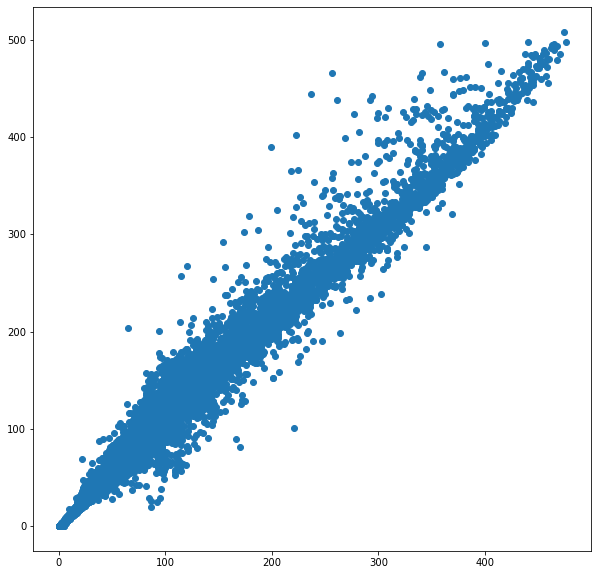

In [248]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, preds, marker='o');


<AxesSubplot:xlabel='Time (months)', ylabel='DHI w/m^2'>

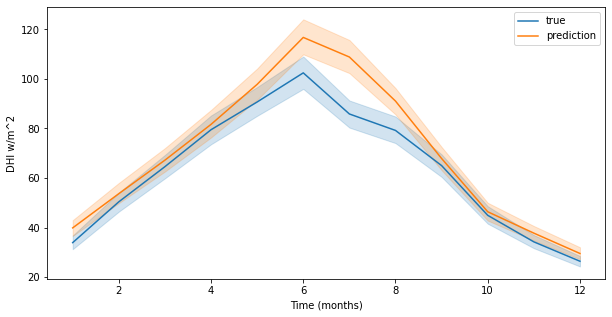

In [282]:
plt.figure(figsize=(10, 5))
plt.ylabel('DHI w/m^2')
plt.xlabel('Time (months)')
sns.lineplot(x = dftesting.Month, y = y_test ,data = dftesting, label="true")
sns.lineplot(x = dftesting.Month, y = preds[:,0], data = dftesting, label="prediction")

In [278]:
print(preds.shape)

(17520, 1)
